Multi-variable gradient descent algorithm for
https://www.coursera.org/learn/machine-learning/home/week/2

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline


In [218]:
class LinearRegressor():
    
    def __init__(self, X, y, theta):
        self._X     = X
        self._y     = y
        self._m     = X.shape[0]
        self._theta = theta
    
    def computeCost(self):
        # hypothesis is a linear function such as
        #   h0(x) = theta(0) * x(0) + theta(1) * x(1) + ... + theta(n) * x(n)
        # where x(0) = 1
        #
        # Cost is SSE (sum of squared errors)
        #   J(theta) = (1/(2 * m)) * (sum((h0(x(i)) - y(i))^2) for i = 1 to m)
        #
        sum = np.sum(np.power((np.dot(self._X, self._theta) - self._y), 2))
        return (sum / (2 * self._m))
    # end of computeCost
    
    def predict(self, xin):
        # column 0 should be Ones
        assert all(xin[:,0] == 1)
        return np.dot(xin, self._theta)
    
    def gradientDescent(self, alpha, iters):
        
        # how many thetas are we computing. Theta is
        # a column vector
        ntheta = self._theta.shape[0]
        
        cost = np.zeros(iters)
        
        # for maximum number of gradient descent
        # iterations
        for ndescent in range(iters):

            # Compute hypothesis h0(x) which is our prediction for y
            #    h0(x) = theta(0) * x(0) + theta(1) * x(1) + ... + theta(n) * x(n)
            # where x(0) = 1  (uses matrix multiplication)
            #
            # Subtract actual Y to give us the error between
            # our prediction and actual.  This produces an
            # error(i) value for every sample (i = 1 to m)
            #
            error = np.dot(self._X, self._theta) - self._y
            
            # dot = np.dot(self._X, self._theta)
            # print("X=",self._X[:10,:])
            # print("theta=", self._theta)
            # print("X dot theta=", dot[:10])
            # print("y=", self._y[:10])
            # print("error=", error[:10])
                        
            # for each theta
            for j in range(ntheta):
                
                # For each sample (i = 1 to m) 
                # sum (error(i) * X(i) for feature (j))
                # 
                e1 = (np.multiply(error.ravel(), self._X[:,j],))
               
                # Select the X column for feature (j) which returns
                # an flattened array of one row.   Multiply corresponding
                # elements of error * row and sum them
                # 
                sum = np.sum(np.multiply(error.ravel(), self._X[:,j]))
               
                # We've already used prior theta for computing 
                # each samples error.  Thus this assignment to
                # theta doesn't affect any interim calculations
                # (i.e. adheres to simultaneous theta update)
                #
                self._theta[j,0] = self._theta[j,0] - (alpha * sum / self._m)
            # end for j

            cost[ndescent] = self.computeCost()
        # end for ndescent

        return self._theta, cost
    # end gradientDescent


In [219]:
df = pd.read_csv('./data/RealEstate.csv', header=0)

featureName = [ 'Size'] #, 'Bedrooms']
targetName  = [ 'Price' ]

# Features and target are both column vectors
# where features are indexed by j and samples by i
#
# x = [[x(i=0)(j=1)] [x(i=0)(j=2)] ... [x(i=0)(j=n)]
#      [x(i=1)(j=1)] [x(i=1)(j=2)] ... [x(i=1)(j=n)]
#                         ...
#      [x(i=m)(j=1)] [x(i=m)(j=2)] ... [x(i=m)(j=n)]]
#
xdf = df[featureName]

# We'll insert a column of Ones so that we can do matrix
# multiplication and theta0 will maintain its identity
#
xdf.insert(0, 'Ones', 1)

# Target we are trying to predict
ydf = df[targetName]

X = np.array(xdf, np.float64)
y = np.array(ydf, np.float64)

# These are some big numbers so lets standardize 
# that by subtracting the mean and dividing by standard
# deviation
#
yStd = np.copy(y)
yStd = (y - y.mean()) / y.std()

# X is a set of multi-column vectors.  We
# skip the Ones column at index[0]
#
XStd = np.copy(X)
for j in range(1, X.shape[1]):
    XStd[:,j] = ((X[:,j] - X[:,j].mean()) / X[:,j].std())

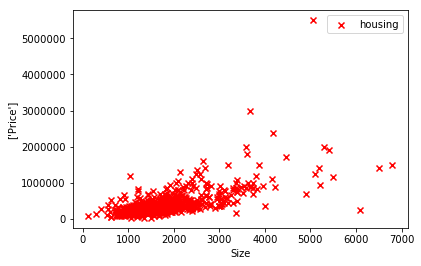

In [220]:
# Take a look at all the features separately against
# the target.
for i in range(1, X.shape[1]):
    plt.scatter(X[:,i], y, color='r', marker='x', label='housing')

    plt.xlabel(xdf.columns.values[i])
    plt.ylabel(ydf.columns.values)

    plt.legend(loc='upper right')
    plt.show()                  


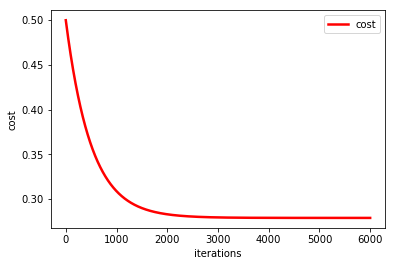

In [221]:
alpha = 0.001
iters = 100
steps = 60
costy = []

# make theta a column vector of X feature length
theta = np.zeros(shape=(xdf.shape[1], 1))

gd = LinearRegressor(XStd, yStd, theta)

plt.xlabel('iterations')
plt.ylabel('cost')

for s in range(0, steps):
    g, cost = gd.gradientDescent(alpha, iters)
    costy = costy + cost.tolist()
    
plt.plot(list(range(0, steps*iters)), costy, linestyle="-", color='r', linewidth=2.5, label='cost')
plt.legend(loc='upper right')
plt.show()

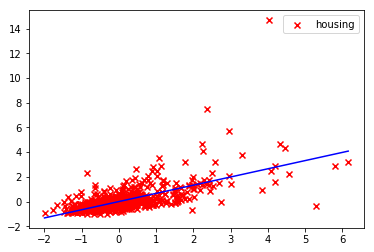

In [222]:

xlin = np.copy(XStd)
xlin[:,1] = np.linspace(XStd[:,1].min(), XStd[:,1].max(), XStd.shape[0])

fx = gd.predict(xlin)
plt.scatter(XStd[:,1], yStd, color='r', marker='x', label='housing')
    
plt.plot(xlin[:,1], fx, color='b', linestyle='-')
plt.legend(loc='upper right')
plt.show()
             
